# 1) Introduction:
This is report assgnment using dataset [Melbourne Housing dataset](https://www.kaggle.com/anthonypino/melbourne-housing-market)  

__Some Keys Detail__

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
* S - property sold;
* SP - property sold prior;
* PI - property passed in;
* PN - sold prior not disclosed;
* SN - sold not disclosed;
* NB - no bid;
* VB - vendor bid;
* W - withdrawn prior to auction;
* SA - sold after auction;
* SS - sold after auction price not disclosed.
* N/A - price or highest bid not available.

Type:
* br - bedroom(s);
* h - house,cottage,villa, semi,terrace;
* u - unit, duplex;
* t - townhouse;
* dev site - development site;
* o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory
# 2) Task:
   1. Examine and explore data (visualization, interactions among features)
   2. Apply the model for prediction with holdout and cross validation
   3. Using PCA, apply the model with holdout and cross validation
   4. Visualize the residue and homoscedasticity
   5. Tune the model if necessary
   6. Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better,etc.)
   7. Include conclusions for summary

# Import Library

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [116]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df.shape
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

the Postcode has not appeared on some Keys Detail 

In [117]:
df = df.drop(['Postcode'],axis = 1)
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea'],
      dtype='object')

# Exploratory Data Analysis
__step 1: check size of dataset__

In [118]:
print('df have size {}'.format(df.shape))

df have size (63023, 12)


__step 2: Missing values__

In [119]:
df.isna().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

the Price have 14590 is NONE values. and because the Price is target attribute so we must drop rows is nan

In [120]:
df.dropna(subset = ["Price"], inplace=True)
print(df.isna().sum())
print(df.shape)
df.info()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64
(48433, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Regionname     48433 non-null  object 
 9   Propertycount  48433 non-null  int64  
 10  Distance       48433 non-null  float64
 11  CouncilArea    48433 non-null  object 
dtypes: float64(2), in

affter remove some rows, We check size of dataset

We can see 
* any attribute haven't  null values
* 8 columns is object 
* 3 columns is int64
* 2 columns is int64

__step3: descriptive statistic__

In [121]:
df.describe(percentiles = [0.01,.1,.25,.5,.75,.9,.95,.99 ])

,Rooms,Price,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000
mean,3.071666,9.978982e+05,7566.399913,12.702761
std,0.944708,5.934989e+05,4457.405884,7.550030
min,1.000000,8.500000e+04,39.000000,0.000000
1%,1.000000,3.120000e+05,852.000000,1.800000
10%,2.000000,4.800400e+05,2674.000000,4.300000
25%,2.000000,6.200000e+05,4280.000000,7.000000
50%,3.000000,8.300000e+05,6567.000000,11.700000
75%,4.000000,1.220000e+06,10412.000000,16.700000
90%,4.000000,1.700000e+06,14577.000000,21.500000


we think Price , Propertycount and Distance have proplem

(array([2.000e+01, 3.980e+02, 2.056e+03, 4.559e+03, 6.538e+03, 6.635e+03,
        5.494e+03, 4.410e+03, 2.974e+03, 2.504e+03, 2.809e+03, 2.028e+03,
        1.521e+03, 1.152e+03, 1.065e+03, 7.800e+02, 6.240e+02, 4.180e+02,
        3.300e+02, 4.100e+02, 2.730e+02, 2.240e+02, 1.610e+02, 1.620e+02,
        1.380e+02, 9.100e+01, 1.020e+02, 6.400e+01, 7.400e+01, 5.000e+01,
        3.600e+01, 3.700e+01, 4.000e+01, 4.000e+01, 1.900e+01, 2.300e+01,
        9.000e+00, 1.600e+01, 1.000e+01, 2.100e+01, 1.400e+01, 1.200e+01,
        9.000e+00, 4.000e+00, 1.300e+01, 5.000e+00, 8.000e+00, 3.000e+00,
        1.400e+01, 5.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

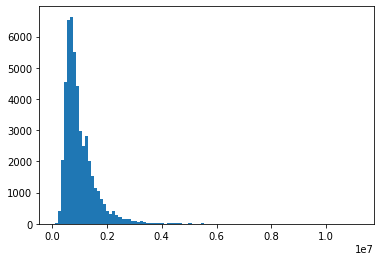

In [122]:

plt.hist(df.Price.values,bins = 100)

the Price has long tail distribution. it must transform to normal distribution

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        6.000e+00, 1.400e+01, 6.000e+00, 2.600e+01, 4.400e+01, 5.300e+01,
        8.300e+01, 1.370e+02, 1.420e+02, 1.940e+02, 2.670e+02, 2.400e+02,
        4.120e+02, 4.970e+02, 6.430e+02, 6.360e+02, 8.690e+02, 1.049e+03,
        1.137e+03, 1.272e+03, 1.467e+03, 1.420e+03, 2.020e+03, 2.232e+03,
        1.862e+03, 2.018e+03, 2.021e+03, 2.091e+03, 1.819e+03, 1.852e+03,
        1.909e+03, 1.749e+03, 1.542e+03, 1.156e+03, 1.288e+03, 1.242e+03,
        1.430e+03, 1.530e+03, 1.209e+03, 1.168e+03, 1.022e+03, 7.140e+02,
        8.680e+02, 7.850e+02, 6.080e+02, 5.970e+02, 4.650e+02, 3.570e+02,
        3.040e+02, 3.000e+02, 3.040e+02, 1.910e+02, 1.980e+02, 1.880e+02,
        1.130e+02, 1.320e+02, 9.400e+01, 6.200e+01, 6.100e+01, 6.800e+01,
        4.700e+01, 2.000e+01, 2.300e+0

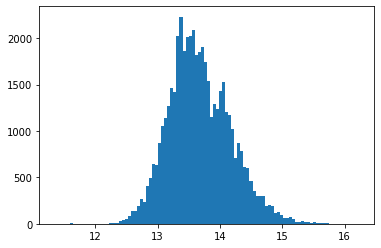

In [123]:
df['Log_Price'] = np.log(df['Price'])
plt.hist(df.Log_Price.values,bins = 100)

has outline at the Price when sen this chart

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4467381da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44673b4828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44677175c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4467357780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4467357198>],
 'means': []}

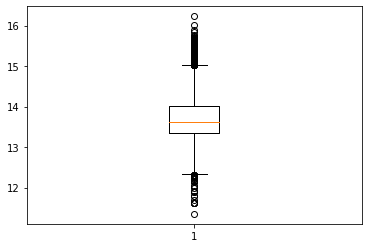

In [124]:
plt.boxplot(df['Log_Price'].values)

beginning remove outline

shape before remove: (48433, 13)
shape affter remove: (46272, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4467727a58>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4467727208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4467727d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44677446a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4467744898>],
 'means': []}

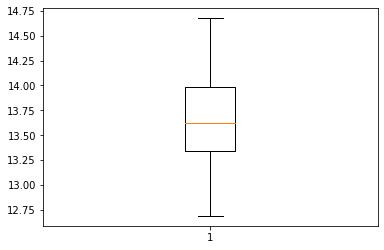

In [125]:
def remove_outline(df,name,option = 1):
    mean = np.mean(df[name].values)
    std  = np.std(df[name].values)
    print('shape before remove: {}'.format(df.shape))
    df = df.loc[ (df[name] <= (mean+option*std)) & (df[name] >= (mean-option*std))  ]
    print('shape affter remove: {}'.format(df.shape))
    return df

df_new = remove_outline(df,name = 'Log_Price',option=2)
plt.boxplot(df_new['Log_Price'].values)

shape affter remove: (46272, 13)


(array([6.500e+02, 3.078e+03, 4.101e+03, 4.625e+03, 4.159e+03, 4.310e+03,
        4.843e+03, 5.095e+03, 3.841e+03, 3.405e+03, 1.552e+03, 2.386e+03,
        7.730e+02, 1.046e+03, 5.810e+02, 1.200e+02, 2.350e+02, 3.960e+02,
        2.830e+02, 1.620e+02, 4.070e+02, 3.000e+00, 3.200e+01, 3.700e+01,
        9.400e+01, 5.600e+01, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.  ,  1.86,  3.72,  5.58,  7.44,  9.3 , 11.16, 13.02, 14.88,
        16.74, 18.6 , 20.46, 22.32, 24.18, 26.04, 27.9 , 29.76, 31.62,
        33.48, 35.34, 37.2 , 39.06, 40.92, 42.78, 44.64, 46.5 , 48.36,
        50.22, 52.08, 53.94, 55.8 ]),
 <BarContainer object of 30 artists>)

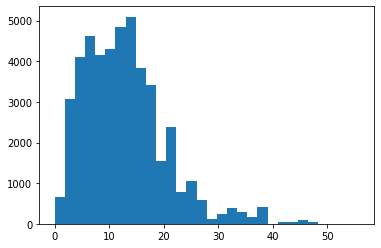

In [127]:
df = df_new
plt.hist(df.Distance.values,bins = 30)

This picture show have outline in range 40 to 50

shape before remove: (45607, 13)
shape affter remove: (45176, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4466e61550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4466e61b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4466e612e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4466e6e0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4466e6e3c8>],
 'means': []}

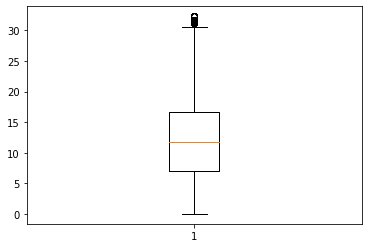

In [134]:
df = df_new
df_new = remove_outline(df,name = "Distance",option = 3)
plt.boxplot(df_new.Distance.values)

(array([ 945., 1595., 4994., 4581., 5777., 4745., 4172., 3162., 3003.,
        2099., 3876.,    0., 1802., 1600., 1575.,    0.,  199.,    0.,
           0., 1051.]),
 array([   83.  ,  1161.35,  2239.7 ,  3318.05,  4396.4 ,  5474.75,
         6553.1 ,  7631.45,  8709.8 ,  9788.15, 10866.5 , 11944.85,
        13023.2 , 14101.55, 15179.9 , 16258.25, 17336.6 , 18414.95,
        19493.3 , 20571.65, 21650.  ]),
 <BarContainer object of 20 artists>)

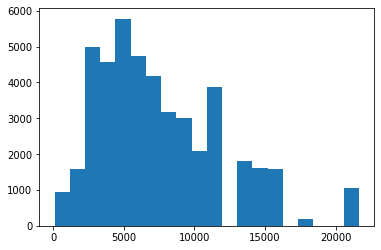

In [136]:
df = df_new
plt.hist(df.Propertycount.values,bins = 20)

have outline Propertycount > 20000

In [146]:
df = df.loc[df['Propertycount'] <= 20000]
print('shape affter remove: {}'.format(df.shape))
df.describe(include = 'O')

shape affter remove: (44125, 13)


,Suburb,Address,Type,Method,SellerG,Date,Regionname,CouncilArea
count,44125,44125,44125,44125,44125,44125,44125,44125
unique,321,40858,3,5,395,112,8,28
top,Bentleigh East,14 Moray St,h,S,Barry,24/03/2018,Northern Metropolitan,Banyule City Council
freq,696,7,30860,28154,4448,797,12225,2865


we can see:
* the Address has  unique very hight.
*  SellerG and Suburb have unique hight

In [142]:
df_numberic = df[['Rooms','Log_Price','Propertycount','Distance']] 
df_numberic.corr()

,Rooms,Log_Price,Propertycount,Distance
Rooms,1.000000,0.407988,-0.050656,0.337515
Log_Price,0.407988,1.000000,-0.055363,-0.237975
Propertycount,-0.050656,-0.055363,1.000000,-0.042378
Distance,0.337515,-0.237975,-0.042378,1.000000


the data focus on the number of rooms is 4.

In [147]:
df_object = df.select_dtypes(include = 'object')

In [148]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44125 entries, 0 to 63020
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       44125 non-null  object
 1   Address      44125 non-null  object
 2   Type         44125 non-null  object
 3   Method       44125 non-null  object
 4   SellerG      44125 non-null  object
 5   Date         44125 non-null  object
 6   Regionname   44125 non-null  object
 7   CouncilArea  44125 non-null  object
dtypes: object(8)
memory usage: 3.0+ MB


In [191]:
def draw_top_class(df,name,tops = 5):
    tops = min(tops,len(df[name].unique()))
    names_class = df[name].value_counts()[:tops].index.tolist()
    print('shape before filter: {}'.format(df.shape))
    df = df.loc[df[name].isin(names_class)]
    print('shape affter filter: {}'.format(df.shape))
    ax = sns.boxplot(x =name,y="Log_Price",data=df)

shape before filter: (44125, 13)
shape affter filter: (3028, 13)


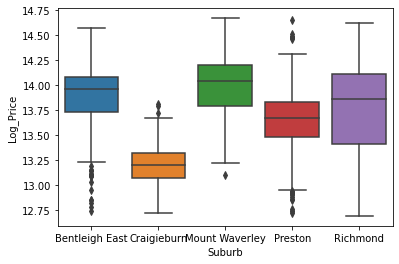

In [192]:
draw_top_class(df,name = 'Suburb')

There are differences between suburbs.  Craigieburn has the lowest price. 

shape before filter: (44125, 13)
shape affter filter: (44125, 13)


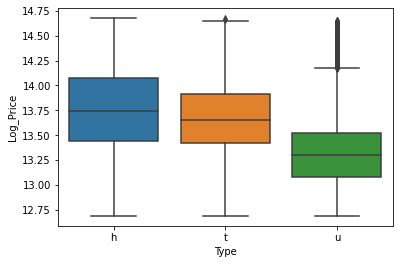

In [194]:
draw_top_class(df,name = 'Type')

There are differences between Types. u has the lowest price.

shape before filter: (44125, 13)
shape affter filter: (44125, 13)


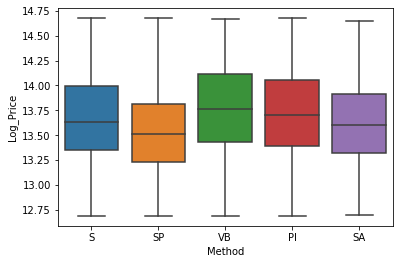

In [197]:
draw_top_class(df,name = 'Method',tops = 10)

There are same same between Method

shape before filter: (44125, 13)
shape affter filter: (24966, 13)


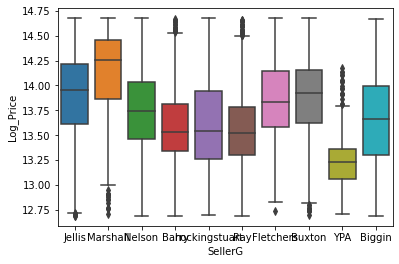

In [201]:
draw_top_class(df,name = 'SellerG',tops = 10)

There are differences between SellerGs. YPA has the lowest price.

shape before filter: (44125, 13)
shape affter filter: (44125, 13)


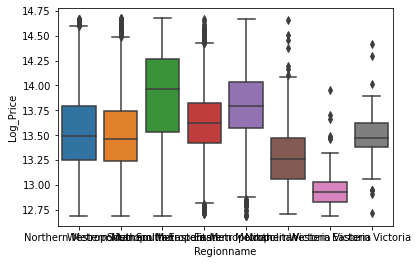

In [202]:
draw_top_class(df,name = 'Regionname',tops = 10)

There are differences between SellerGs.

shape before filter: (44125, 13)
shape affter filter: (24504, 13)


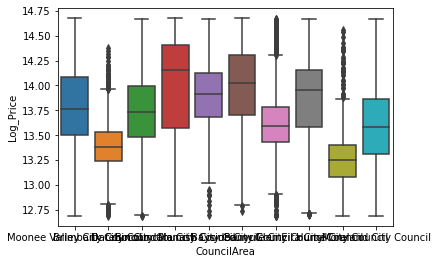

In [203]:

draw_top_class(df,name = 'CouncilArea',tops = 10)

There are differences between SellerGs.

In [204]:
df = df.drop(['Address'],axis = 1)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44125 entries, 0 to 63020
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         44125 non-null  object 
 1   Rooms          44125 non-null  int64  
 2   Type           44125 non-null  object 
 3   Price          44125 non-null  float64
 4   Method         44125 non-null  object 
 5   SellerG        44125 non-null  object 
 6   Date           44125 non-null  object 
 7   Regionname     44125 non-null  object 
 8   Propertycount  44125 non-null  int64  
 9   Distance       44125 non-null  float64
 10  CouncilArea    44125 non-null  object 
 11  Log_Price      44125 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 4.4+ MB
